In [11]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [12]:
Signal1 = pd.read_csv("signal1.csv",header=None)
Signal2 = pd.read_csv("signal2.csv",header=None)
Signal3 = pd.read_csv("signal3.csv",header=None)
Signal4 = pd.read_csv("signal4.csv",header=None)
Signal5 = pd.read_csv("signal5.csv",header=None)
Signal6 = pd.read_csv("signal6.csv",header=None)
Dataframe = pd.concat([Signal1,Signal2,Signal3,Signal4,Signal5,Signal6],axis=1,ignore_index=True)

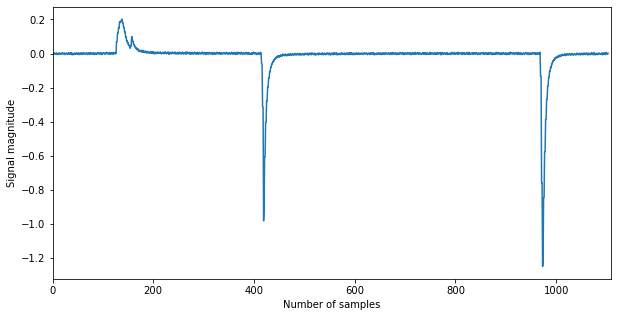

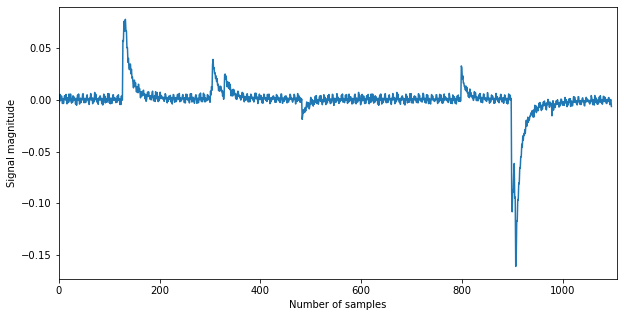

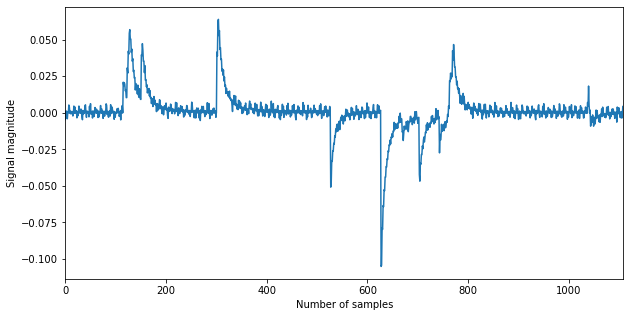

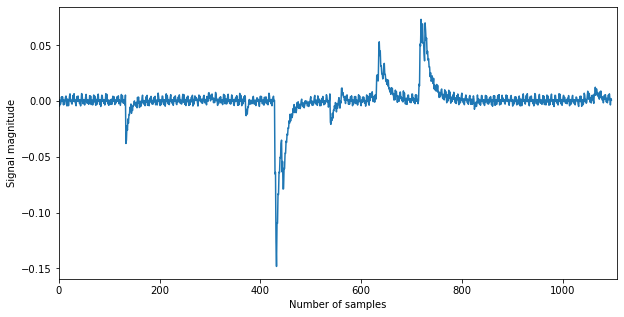

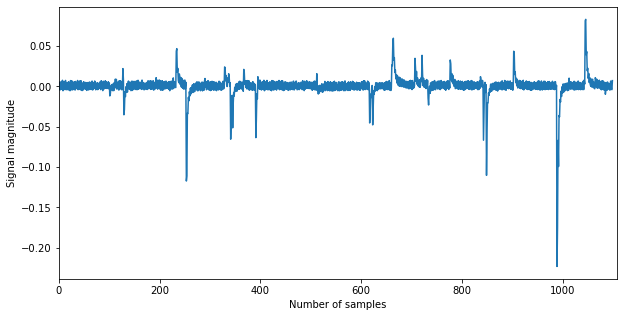

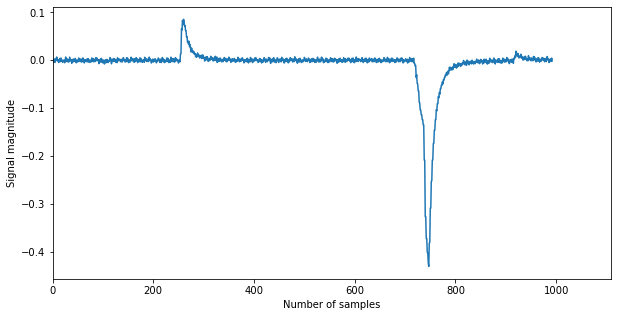

In [13]:
figs = {}
axs = {}
for i in range(Dataframe.shape[1]):
    figs[i] = plt.figure(figsize=(10,5))
    axs[i] =figs[i].add_subplot(111)
    axs[i].plot(Dataframe[i])  
    axs[i].set_xlim(0,Dataframe[i].shape[0])
    axs[i].set_ylabel('Signal magnitude')
    axs[i].set_xlabel('Number of samples')   

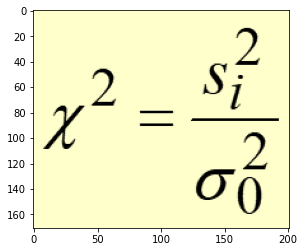

In [14]:
image = mpimg.imread("varianceformula.png")
plt.imshow(image)
plt.show()

In [22]:
def anomaly_detection(signal,threshold,window_size):
    X = signal[:60]
    variance_flux0 = np.var(X)
    decision_var = []
    variance_comparison = []
    time = []
    for window in range(window_size,signal.shape[0]+1):
        u = (np.std(signal[window-20:window])**2)/variance_flux0
        variance_comparison.append(u)
        if ((u >= threshold).bool() | (u <= -threshold).bool()): #threshold
            decision_var.append(1)
            time.append(window - int(window_size/2)) 
            time.append(window - 19)
        else:
            decision_var.append(0)
    return time, decision_var, variance_comparison
    

In [23]:
signal = Signal1  # 6 signals (0...5)
threshold = 2
window_size = 20
time, decision_var, variance_comparison = anomaly_detection(signal,threshold,window_size)

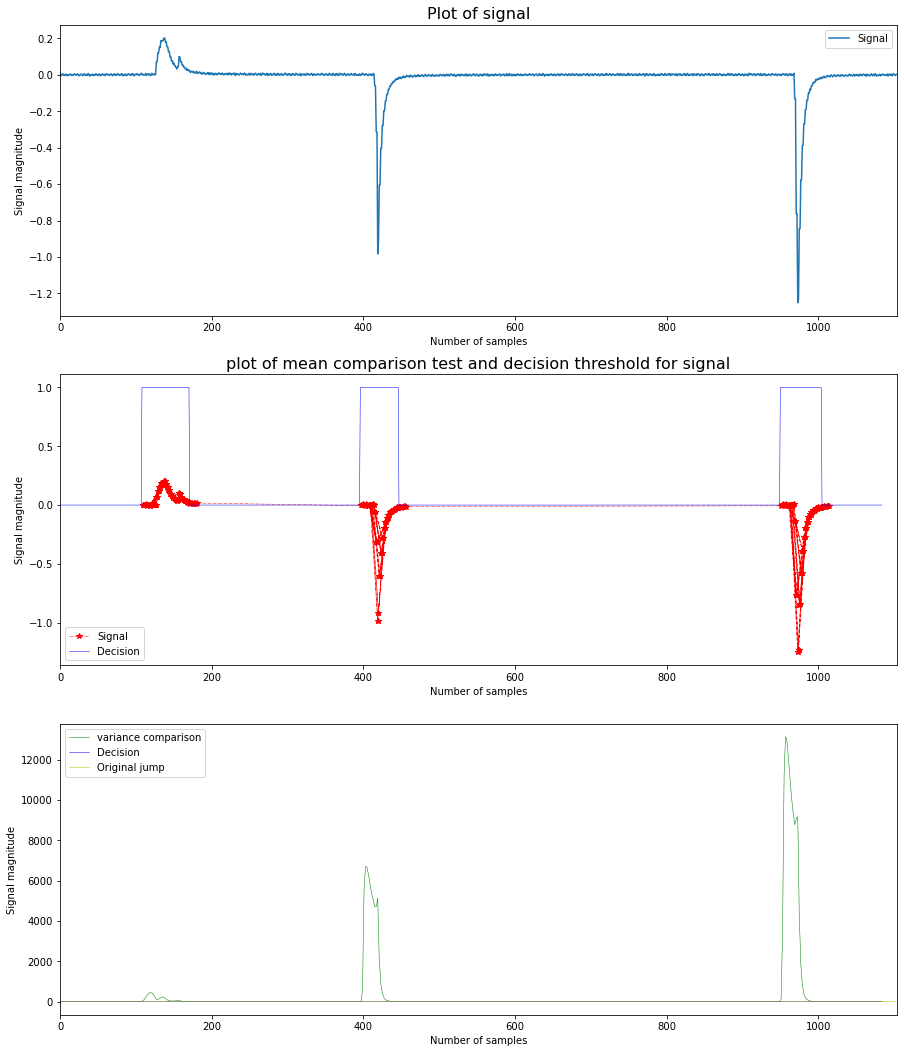

In [25]:
fig,axs = plt.subplots(3,1,figsize=(15,10))
axs = axs.reshape(-1)
axs[0].plot(signal,label='Signal')
axs[0].set_xlim(0,signal.shape[0])
axs[0].set_xlabel('Number of samples')
axs[0].set_ylabel('Signal magnitude')
axs[0].legend(loc=0)

axs[1].plot(time,signal[0][time],'-.*',color='r',linewidth=0.5,label='Signal')
axs[1].plot(decision_var,color='b',linewidth=0.5,label='Decision')
axs[1].set_xlim(0,signal.shape[0])
axs[0].set_title('Plot of signal', fontsize=16)
axs[1].set_xlabel('Number of samples')
axs[1].set_ylabel('Signal magnitude')
axs[1].legend(loc=0)

axs[2].plot(variance_comparison,color='g',linewidth=0.5,label='variance comparison')
axs[2].plot(decision_var,color='b',linewidth=0.5,label='Decision')
axs[2].plot(signal,color='y',linewidth=0.5,label='Original jump')
axs[2].set_xlim(0,signal.shape[0])
axs[1].set_title('plot of mean comparison test and decision threshold for signal', fontsize=16)
axs[2].set_xlabel('Number of samples')
axs[2].set_ylabel('Signal magnitude')
axs[2].legend(loc=0)
plt.subplots_adjust( top = 1.5 )
plt.show()